In [83]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [84]:
# Load Datasets
cwd = Path.cwd()

# EDA → Python → Scripts → Project and then down into Data/covariates
covariates_dir = cwd.parents[2] / "Data" / "covariates"

In [85]:
# Read the ethnic_group_2021.csv file to start exploring
ethnic_df = pd.read_csv(covariates_dir / "ethnic_group_2021.csv")
ethnic_df

,Lower tier local authorities Code,Lower tier local authorities,Ethnic group (20 categories) Code,Ethnic group (20 categories),Observation
0,E06000001,Hartlepool,-8,Does not apply,0
1,E06000001,Hartlepool,1,"Asian, Asian British or Asian Welsh: Bangladeshi",278
2,E06000001,Hartlepool,2,"Asian, Asian British or Asian Welsh: Chinese",217
3,E06000001,Hartlepool,3,"Asian, Asian British or Asian Welsh: Indian",335
4,E06000001,Hartlepool,4,"Asian, Asian British or Asian Welsh: Pakistani",297
...,...,...,...,...,...
6615,W06000024,Merthyr Tydfil,15,White: Gypsy or Irish Traveller,56
6616,W06000024,Merthyr Tydfil,16,White: Roma,26
6617,W06000024,Merthyr Tydfil,17,White: Other White,2029
6618,W06000024,Merthyr Tydfil,18,Other ethnic group: Arab,17


In [86]:
ethnic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lower tier local authorities Code  6620 non-null   object
 1   Lower tier local authorities       6620 non-null   object
 2   Ethnic group (20 categories) Code  6620 non-null   int64 
 3   Ethnic group (20 categories)       6620 non-null   object
 4   Observation                        6620 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 258.7+ KB


In [87]:
ethnic_df.describe()

,Ethnic group (20 categories) Code,Observation
count,6620.000000,6620.000000
mean,9.100000,9002.655287
std,6.625453,34837.460138
min,-8.000000,0.000000
25%,4.750000,190.000000
50%,9.500000,600.000000
75%,14.250000,2197.500000
max,19.000000,595737.000000


In [88]:
# count the number of unique values in the dataframe
ethnic_df.nunique()

Lower tier local authorities Code     331
Lower tier local authorities          331
Ethnic group (20 categories) Code      20
Ethnic group (20 categories)           20
Observation                          3140
dtype: int64

In [89]:
# Formatter for “#.# M”
millions_fmt = mtick.FuncFormatter(lambda x, pos: f'{x:.1f} M')

C:\Users\caela\AppData\Local\Temp\ipykernel_32884\609704143.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(pivot20_m.index, rotation=45, ha='right')


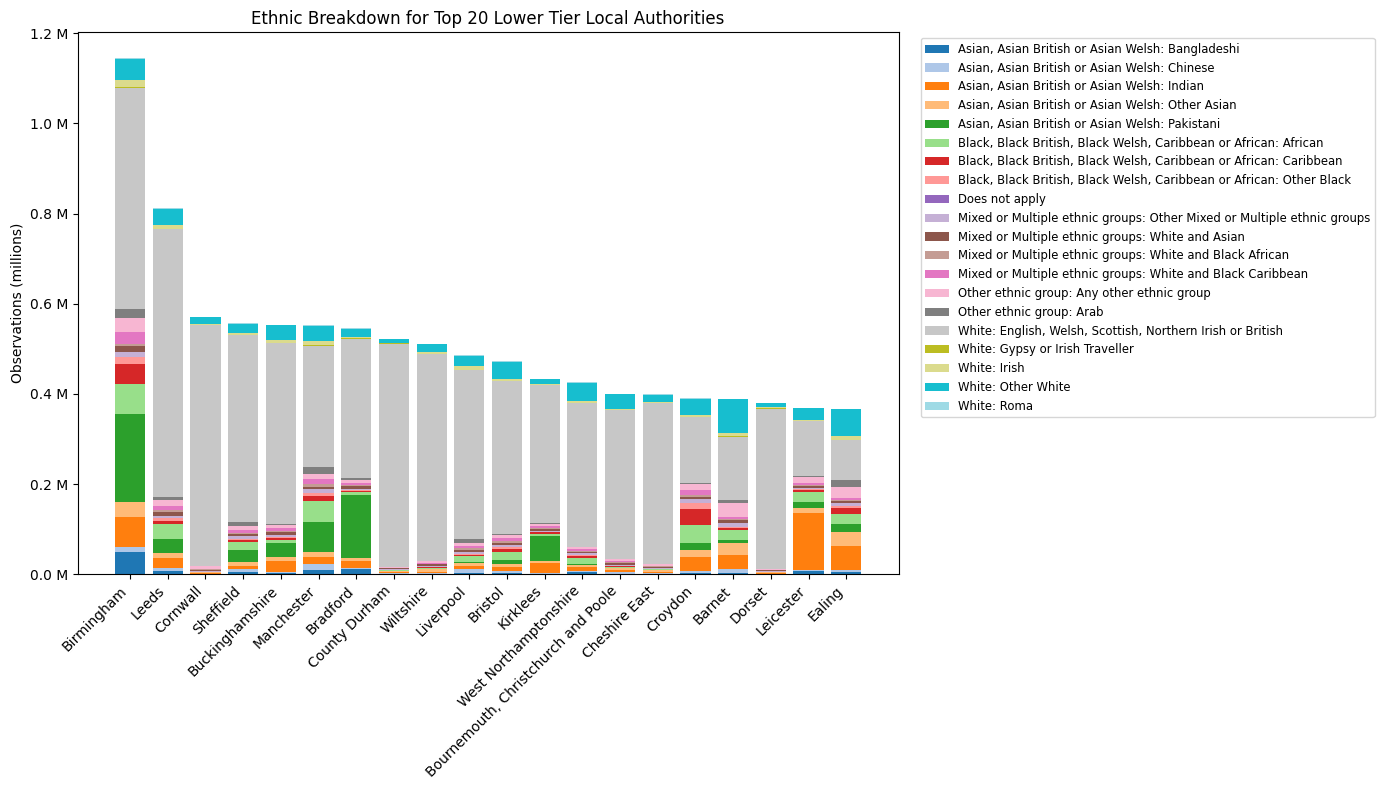

In [90]:
# Ethnic breakdown for top 20 authorities (in millions)
# pick top 20 by total pop
top20 = (
    ethnic_df
    .groupby('Lower tier local authorities')['Observation']
    .sum()
    .nlargest(20)
)
top20_auths = top20.index.tolist()

# pivot and rescale
pivot20 = (
    ethnic_df[ethnic_df['Lower tier local authorities'].isin(top20_auths)]
    .pivot(index='Lower tier local authorities',
           columns='Ethnic group (20 categories)',
           values='Observation')
    .fillna(0)
    .loc[top20_auths]
)
pivot20_m = pivot20 / 1e6

# get distinct colors
cats = pivot20_m.columns
cmap = plt.get_cmap('tab20', len(cats))
colors = [cmap(i) for i in range(len(cats))]

# plot stacked
fig, ax = plt.subplots(figsize=(14, 8))
bottom = [0] * len(pivot20_m)
for i, cat in enumerate(cats):
    ax.bar(
        pivot20_m.index,
        pivot20_m[cat],
        bottom=bottom,
        label=cat,
        color=colors[i]
    )
    bottom = [b + v for b, v in zip(bottom, pivot20_m[cat])]

ax.set_ylabel('Observations (millions)')
ax.set_title('Ethnic Breakdown for Top 20 Lower Tier Local Authorities')
ax.set_xticklabels(pivot20_m.index, rotation=45, ha='right')
ax.yaxis.set_major_formatter(millions_fmt)
ax.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize='small'
)
plt.tight_layout()
plt.show()

In [91]:
# 1. Total count per ethnic group
counts = (
    ethnic_df
    .groupby('Ethnic group (20 categories)')['Observation']
    .sum()
    .rename('count')
)

# 2. Grand total
grand_total = counts.sum()

# 3. Percentage per group
percent = (counts / grand_total * 100).rename('percent')

# 4. Combine into one DataFrame
summary = pd.concat([counts, percent], axis=1)

# 5. (Optional) Sort by count descending
summary = summary.sort_values('count', ascending=False)

print(summary)

                                                       count    percent
Ethnic group (20 categories)                                           
White: English, Welsh, Scottish, Northern Irish...  44355044  74.424239
White: Other White                                   3667993   6.154601
Asian, Asian British or Asian Welsh: Indian          1864304   3.128154
Asian, Asian British or Asian Welsh: Pakistani       1587822   2.664239
Black, Black British, Black Welsh, Caribbean or...   1488387   2.497395
Asian, Asian British or Asian Welsh: Other Asian      972783   1.632253
Other ethnic group: Any other ethnic group            923776   1.550023
Asian, Asian British or Asian Welsh: Bangladeshi      644900   1.082091
Black, Black British, Black Welsh, Caribbean or...    623115   1.045537
Mixed or Multiple ethnic groups: White and Blac...    513040   0.860840
White: Irish                                          507473   0.851499
Mixed or Multiple ethnic groups: White and Asian      488228   0

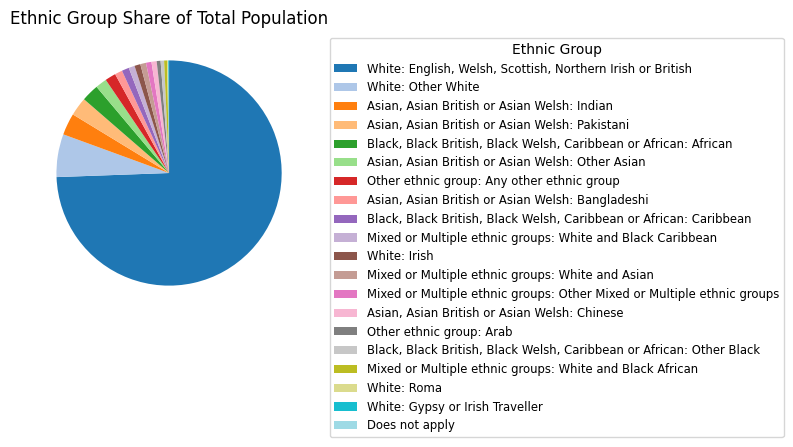

In [92]:
# 1. Compute total counts per group
counts = (
    ethnic_df
    .groupby('Ethnic group (20 categories)')['Observation']
    .sum()
    .sort_values(ascending=False)
)

# 2. Generate one distinct color per group
num_groups = len(counts)
cmap = plt.get_cmap('tab20', num_groups)
colors = [cmap(i) for i in range(num_groups)]

# 3. Draw pie chart without labels, but with unique colors
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    counts.values,
    labels=None,
    colors=colors,
    startangle=90,
    counterclock=False
)
ax.set_title('Ethnic Group Share of Total Population')

# 4. Legend to the right
ax.legend(
    counts.index,
    title='Ethnic Group',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize='small'
)

plt.tight_layout()
plt.show()


### SUMMARY

- Complete coverage: 6 620 rows, no missing values, covering 331 local authorities and 20 ethnic categories.

- White British dominance: Aggregate totals show ~45 million White British, followed by ~3.5 million Other White and ~1.8 million Indian.

- Top authorities: Birmingham (≈ 1.15 M), Leeds (≈ 0.8 M), Cornwall (≈ 0.55 M), etc., are the largest by total population.

- Ethnic mix in big cities: While White British is the largest block everywhere, cities like Birmingham, Bradford, Manchester and Leicester have substantial South Asian minorities, and places like Ealing show notable “Other White” shares.